# Sequencias 

Em Python, sequencias (FINITAS!) podem ser armazenadas em listas. A seguir, vemos como criar sequencias de diversas maneiras. 

Vamos tomar por modelo a sequencia 

$$s_n = n^2, \, n = 1,2,3,\ldots,9,10,$$

cujos termos são os 10 primeiros números quadrados.

## Usando `for` 

In [1]:
s = []
for n in range(11):
    s.append(n**2)
s

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## Usando compreensão de lista

In [2]:
s = [n**2 for n in range(11)]
s

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## Usando `lambda` e compreensão de lista

In [3]:
S = lambda n : n**2 
s = [S(n) for n in range(11)]
s

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

## Usando `lambda` e `numpy.arange`

In [4]:
from numpy import arange

S = lambda n : n**2
s = S(arange(11))
s

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

## Usando `map`

In [5]:
s = list(map(lambda n : n**2,range(11))) # type casting
s

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

### Analisando qual operação é mais eficiente

A sintaxe 
```python
%%timeit -t -n5
```
estima o tempo de execução do código na célula repetido 5 vezes.

In [6]:
%%timeit -t -n5
s = []
for n in range(11):
    s.append(n**2)
s

5.72 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [7]:
%%timeit -t -n5
s = [n**2 for n in range(11)]
s

4.56 µs ± 962 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [8]:
%%timeit -t -n5
S = lambda n : n**2 
s = [S(n) for n in range(11)]
s

4.4 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [9]:
%%timeit -t -n5
from numpy import arange

S = lambda n : n**2
s = S(arange(11))
s

8.73 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [10]:
%%timeit -t -n5
s = list(map(lambda n : n**2,range(11))) # requer 'type casting'


6.85 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)


**Conclusão:** a criação de sequencias por compreensão de lista é o método mais eficiente em termos de tempo de execução.

## Exemplos


$a_n = 1/n, n \in [1,10] \subset \mathbb{N}$

In [11]:
a = [1./n for n in range(1,11)]
print(a)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]


$b_n = \frac{n}{(n+1)}, n \in [0,6] \subset \mathbb{N}$

In [12]:
b = [n/(n+1) for n in range(0,7)]
print(b)

[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571]


$c_n = \sqrt{n} + n^{3/4}, n \in [1,10] \subset \mathbb{N}$

In [13]:
from math import sqrt 

c = [sqrt(n) + n**(3/4) for n in range(0,7)]
print(c)

[0.0, 2.0, 3.096006392880524, 4.011557864523654, 4.82842712474619, 5.5797695023819, 6.283148368260813]


$d_n = 2^{nr}, n \in [0,10] \subset \mathbb{N}, r \in \{-1.-0.5,0.5,1.0\}$

Neste exemplo, criaremos uma sequencia para cada um dos valores de $r$. Por conveniência, definamos a seguinte função.

In [14]:
# define sequencia 
def d(r):
    return [2**(n*r) for n in range(10)]

In [15]:
# r = -1
d1 = d(-1)
d1

[1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125]

In [16]:
# r = -0.5
d2 = d(-0.5)
d2

[1.0,
 0.7071067811865476,
 0.5,
 0.3535533905932738,
 0.25,
 0.1767766952966369,
 0.125,
 0.08838834764831845,
 0.0625,
 0.04419417382415922]

In [17]:
# r = 0
d3 = d(0)
d3

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
# r = 0.5
d4 = d(0.5)
d4

[1.0,
 1.4142135623730951,
 2.0,
 2.8284271247461903,
 4.0,
 5.656854249492381,
 8.0,
 11.313708498984761,
 16.0,
 22.627416997969522]

In [19]:
# r = 1.0
d5 = d(1.0)
d5

[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]

### Visualizando convergência

Sequencias tendendo para o valor-limite zero.

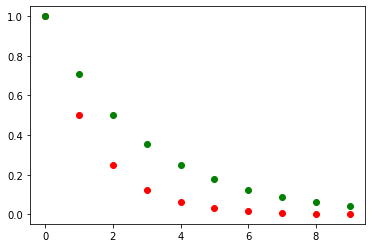

In [20]:
%matplotlib inline 
from matplotlib.pyplot import plot

plot(d1,'or');
plot(d2,'og'); 

### Visualizando divergência
Sequencias tendendo para infinito.

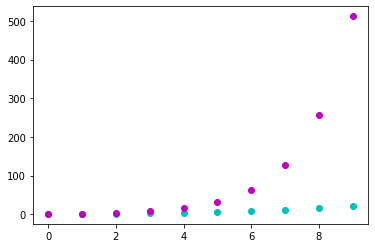

In [21]:
plot(d4,'oc');
plot(d5,'om');

## Somatórios

### Usando `for` e incremento 

Em Python, podemos construir somatórios realizando sobrecarga do operador `+` de acordo com o seguinte código:

```python
s = 0 # variável inicializada com valor zero
for k in range(n):
    s += f(k) # computa e incrementa
```

O código equivalente é: 

```python
s = 0 # variável inicializada com valor zero
for k in range(n):
    s = s + f(k) # computa e incrementa       
```

### Exemplos

$f_k = k + 2, k \in [0,10]$

In [22]:
s = 0
for k in range(11):
    s += k + 2
s

77

### Usando compreensão de lista e `sum`

Podemos também computar o somatório de uma forma "semi-vetorizada" usando `sum` e listas. 

In [25]:
sum([k+2 for k in range(11)])

77

Em casos mais simples, não precisamos do `for`, como em:

In [27]:
sum(range(10))

45

In [49]:
sum(range(1,10,2)) # soma ímpares < 10

25

In [52]:
sum(range(2,10,2)) # soma pares < 10

20